In [36]:
import tensorflow as tf

# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [37]:
# import fashion mnist dataset
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [38]:
dataset

{'test': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [39]:
train_dataset

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [40]:
# class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [41]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [42]:
# normalizing the pixel values, which range [0,255] into range [0,1]

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

In [43]:
train_dataset

<CacheDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

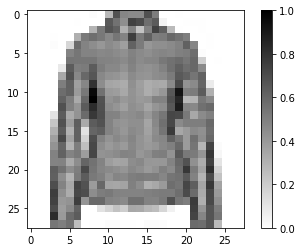

In [44]:
# plotting a single image

# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

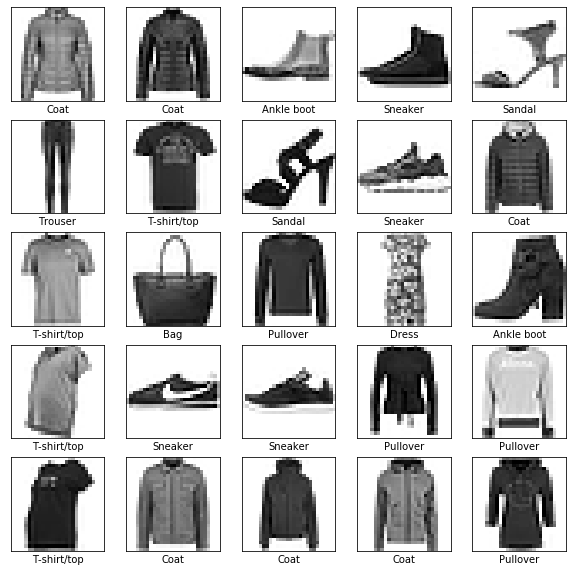

In [45]:
# plot the first 25 images

plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [46]:
# build the model
# 1 input layer
# 1 hidden dense layer
# 1 output dense layer

model = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(28, 28, 1)), #input, flatten 28x28 into array of length 784
                tf.keras.layers.Dense(128, activation=tf.nn.relu),
                tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [47]:
# compile the model and specify optimizer, loss function, and training metric

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [48]:
# define how iterating over the training dataset will occur

BATCH_SIZE = 32 # the number of exampels(batch size) to use when updating model parameters

train_dataset = train_dataset.cache().repeat() #train indefinitely

train_dataset = train_dataset.shuffle(num_train_examples) # randomize the order of the input data

train_dataset = train_dataset.batch(BATCH_SIZE) # update model parameters using batches of BATCH_SIZE

test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [49]:
# Train the model
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - ETA: 0s - loss: 2.4111 - accuracy: 0.18 - ETA: 3s - loss: 1.4381 - accuracy: 0.54 - ETA: 3s - loss: 1.1608 - accuracy: 0.61 - ETA: 3s - loss: 1.0287 - accuracy: 0.65 - ETA: 3s - loss: 0.9409 - accuracy: 0.68 - ETA: 3s - loss: 0.8671 - accuracy: 0.70 - ETA: 3s - loss: 0.8318 - accuracy: 0.71 - ETA: 3s - loss: 0.7978 - accuracy: 0.72 - ETA: 3s - loss: 0.7781 - accuracy: 0.73 - ETA: 3s - loss: 0.7659 - accuracy: 0.73 - ETA: 3s - loss: 0.7535 - accuracy: 0.74 - ETA: 3s - loss: 0.7405 - accuracy: 0.74 - ETA: 3s - loss: 0.7258 - accuracy: 0.74 - ETA: 3s - loss: 0.7109 - accuracy: 0.75 - ETA: 3s - loss: 0.6973 - accuracy: 0.75 - ETA: 3s - loss: 0.6859 - accuracy: 0.76 - ETA: 3s - loss: 0.6720 - accuracy: 0.76 - ETA: 3s - loss: 0.6629 - accuracy: 0.77 - ETA: 3s - loss: 0.6539 - accuracy: 0.77 - ETA: 3s - loss: 0.6479 - accuracy: 0.77 - ETA: 3s - loss: 0.6384 - accuracy: 0.77 - ETA: 2s - loss: 0.6292 - accuracy: 0.78 - ETA: 2s - loss: 0.623

1875/1875 [==============================] - ETA: 0s - loss: 0.3505 - accuracy: 0.84 - ETA: 6s - loss: 0.4195 - accuracy: 0.85 - ETA: 7s - loss: 0.4334 - accuracy: 0.84 - ETA: 7s - loss: 0.4273 - accuracy: 0.85 - ETA: 6s - loss: 0.4319 - accuracy: 0.84 - ETA: 6s - loss: 0.4222 - accuracy: 0.84 - ETA: 6s - loss: 0.4147 - accuracy: 0.84 - ETA: 6s - loss: 0.4084 - accuracy: 0.85 - ETA: 6s - loss: 0.4191 - accuracy: 0.84 - ETA: 6s - loss: 0.4155 - accuracy: 0.84 - ETA: 6s - loss: 0.4070 - accuracy: 0.85 - ETA: 6s - loss: 0.4037 - accuracy: 0.85 - ETA: 6s - loss: 0.4100 - accuracy: 0.85 - ETA: 6s - loss: 0.4082 - accuracy: 0.85 - ETA: 6s - loss: 0.4057 - accuracy: 0.85 - ETA: 6s - loss: 0.4044 - accuracy: 0.85 - ETA: 6s - loss: 0.4088 - accuracy: 0.85 - ETA: 6s - loss: 0.4063 - accuracy: 0.85 - ETA: 6s - loss: 0.4026 - accuracy: 0.85 - ETA: 6s - loss: 0.3977 - accuracy: 0.85 - ETA: 6s - loss: 0.3965 - accuracy: 0.85 - ETA: 6s - loss: 0.3955 - accuracy: 0.85 - ETA: 6s - loss: 0.3975 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.4369 - accuracy: 0.81 - ETA: 6s - loss: 0.3848 - accuracy: 0.86 - ETA: 6s - loss: 0.3787 - accuracy: 0.86 - ETA: 6s - loss: 0.3669 - accuracy: 0.87 - ETA: 7s - loss: 0.3600 - accuracy: 0.87 - ETA: 7s - loss: 0.3554 - accuracy: 0.87 - ETA: 7s - loss: 0.3537 - accuracy: 0.87 - ETA: 6s - loss: 0.3627 - accuracy: 0.87 - ETA: 6s - loss: 0.3579 - accuracy: 0.87 - ETA: 6s - loss: 0.3595 - accuracy: 0.87 - ETA: 6s - loss: 0.3610 - accuracy: 0.87 - ETA: 6s - loss: 0.3577 - accuracy: 0.87 - ETA: 6s - loss: 0.3569 - accuracy: 0.87 - ETA: 6s - loss: 0.3532 - accuracy: 0.87 - ETA: 6s - loss: 0.3529 - accuracy: 0.87 - ETA: 5s - loss: 0.3479 - accuracy: 0.87 - ETA: 5s - loss: 0.3503 - accuracy: 0.87 - ETA: 5s - loss: 0.3498 - accuracy: 0.87 - ETA: 5s - loss: 0.3486 - accuracy: 0.87 - ETA: 5s - loss: 0.3497 - accuracy: 0.87 - ETA: 5s - loss: 0.3481 - accuracy: 0.87 - ETA: 5s - loss: 0.3482 - accuracy: 0.87 - ETA: 5s - loss: 0.3497 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.2132 - accuracy: 0.93 - ETA: 9s - loss: 0.2718 - accuracy: 0.89 - ETA: 7s - loss: 0.3090 - accuracy: 0.88 - ETA: 7s - loss: 0.3115 - accuracy: 0.88 - ETA: 6s - loss: 0.3208 - accuracy: 0.88 - ETA: 6s - loss: 0.3080 - accuracy: 0.88 - ETA: 6s - loss: 0.3152 - accuracy: 0.88 - ETA: 6s - loss: 0.3195 - accuracy: 0.88 - ETA: 6s - loss: 0.3064 - accuracy: 0.89 - ETA: 6s - loss: 0.3030 - accuracy: 0.89 - ETA: 5s - loss: 0.3085 - accuracy: 0.88 - ETA: 5s - loss: 0.3044 - accuracy: 0.88 - ETA: 5s - loss: 0.3024 - accuracy: 0.88 - ETA: 5s - loss: 0.3021 - accuracy: 0.88 - ETA: 5s - loss: 0.3047 - accuracy: 0.88 - ETA: 5s - loss: 0.3062 - accuracy: 0.88 - ETA: 5s - loss: 0.3014 - accuracy: 0.88 - ETA: 5s - loss: 0.3064 - accuracy: 0.88 - ETA: 5s - loss: 0.3071 - accuracy: 0.88 - ETA: 5s - loss: 0.3075 - accuracy: 0.88 - ETA: 5s - loss: 0.3068 - accuracy: 0.88 - ETA: 5s - loss: 0.3082 - accuracy: 0.88 - ETA: 5s - loss: 0.3119 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.1959 - accuracy: 0.93 - ETA: 5s - loss: 0.2655 - accuracy: 0.90 - ETA: 5s - loss: 0.2899 - accuracy: 0.90 - ETA: 6s - loss: 0.2840 - accuracy: 0.90 - ETA: 6s - loss: 0.2879 - accuracy: 0.89 - ETA: 6s - loss: 0.2862 - accuracy: 0.89 - ETA: 5s - loss: 0.2935 - accuracy: 0.89 - ETA: 5s - loss: 0.2908 - accuracy: 0.89 - ETA: 5s - loss: 0.2916 - accuracy: 0.89 - ETA: 5s - loss: 0.2883 - accuracy: 0.89 - ETA: 5s - loss: 0.2848 - accuracy: 0.89 - ETA: 5s - loss: 0.2846 - accuracy: 0.89 - ETA: 5s - loss: 0.2857 - accuracy: 0.89 - ETA: 5s - loss: 0.2843 - accuracy: 0.89 - ETA: 5s - loss: 0.2843 - accuracy: 0.89 - ETA: 5s - loss: 0.2837 - accuracy: 0.89 - ETA: 5s - loss: 0.2847 - accuracy: 0.89 - ETA: 5s - loss: 0.2869 - accuracy: 0.89 - ETA: 5s - loss: 0.2875 - accuracy: 0.89 - ETA: 5s - loss: 0.2885 - accuracy: 0.89 - ETA: 5s - loss: 0.2898 - accuracy: 0.89 - ETA: 5s - loss: 0.2893 - accuracy: 0.89 - ETA: 5s - loss: 0.2891 - accura

In [50]:
# evaluate the model against the training data 

test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))

print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - ETA: 0s - loss: 0.2032 - accuracy: 0.93 - ETA: 1s - loss: 0.3536 - accuracy: 0.88 - ETA: 1s - loss: 0.3773 - accuracy: 0.87 - ETA: 1s - loss: 0.3674 - accuracy: 0.87 - ETA: 0s - loss: 0.3622 - accuracy: 0.87 - ETA: 0s - loss: 0.3620 - accuracy: 0.87 - ETA: 0s - loss: 0.3581 - accuracy: 0.87 - ETA: 0s - loss: 0.3559 - accuracy: 0.87 - ETA: 0s - loss: 0.3512 - accuracy: 0.87 - ETA: 0s - loss: 0.3491 - accuracy: 0.87 - ETA: 0s - loss: 0.3490 - accuracy: 0.87 - ETA: 0s - loss: 0.3555 - accuracy: 0.87 - ETA: 0s - loss: 0.3543 - accuracy: 0.87 - ETA: 0s - loss: 0.3586 - accuracy: 0.87 - ETA: 0s - loss: 0.3544 - accuracy: 0.87 - ETA: 0s - loss: 0.3552 - accuracy: 0.87 - ETA: 0s - loss: 0.3573 - accuracy: 0.87 - ETA: 0s - loss: 0.3561 - accuracy: 0.87 - ETA: 0s - loss: 0.3578 - accuracy: 0.87 - ETA: 0s - loss: 0.3586 - accuracy: 0.87 - ETA: 0s - loss: 0.3620 - accuracy: 0.87 - ETA: 0s - loss: 0.3582 - accuracy: 0.87 - ETA: 0s - loss: 0.3570 - accuracy

In [51]:
print('Accuracy on test dataset:', test_accuracy)

Accuracy on test dataset: 0.8715000152587891


In [62]:
# make predictions for the images

for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [63]:
predictions.shape


(32, 10)

In [ ]:
predictions

In [64]:
predictions[0]

array([8.3678069e-06, 7.6884044e-06, 1.2902046e-02, 2.3634007e-07,
       9.8214036e-01, 1.3760780e-09, 4.8950678e-03, 1.1526574e-08,
       4.6266963e-05, 2.3257454e-09], dtype=float32)

In [65]:
np.argmax(predictions[0])

4

In [66]:
test_labels[0]

4

In [67]:
# plot the predictions

def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

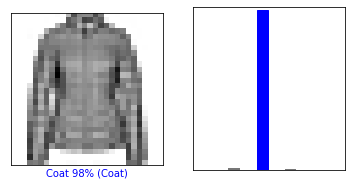

In [68]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

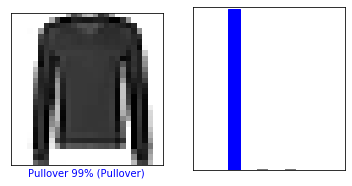

In [69]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

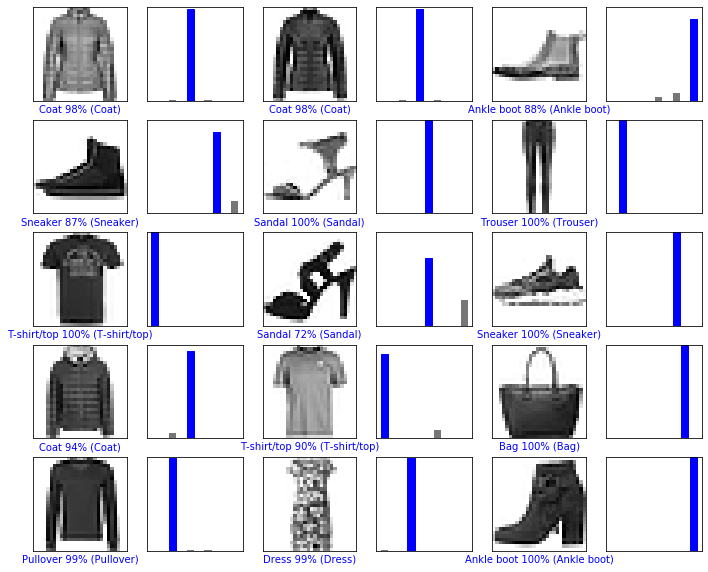

In [70]:
# multiple images
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [71]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [72]:
# Add the image to a batch where it's the only member.
# TF looks for a list of examples for predictions.
bas
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [73]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.3678060e-06 7.6883953e-06 1.2902050e-02 2.3634048e-07 9.8214024e-01
  1.3760805e-09 4.8950701e-03 1.1526617e-08 4.6266956e-05 2.3257498e-09]]


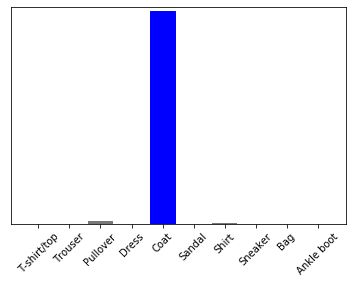

In [74]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [75]:
np.argmax(predictions_single[0])

4